## Ордин Сергей Юрьевич, 3530903/90001
## Задание 37. Вариант 4

Вычислить несколько первых коэффициентов Фурье для функции $x = x(t)$ по указанной системе ортогональных многочленов.<br>
Подтвердить графически сходимость ряда Фурье к функции x.

$$
4)\ x(t) = cos(t) + ln(t),\ многочлены\ Лагерра
$$

**Многочлены Лагерра в гильбертовом пространстве:** $$L_k(t):
L^{2,\xi}(0;+\infty), \ \xi(t) = e^{-t}
$$

**Формируем ортонормированный базис из многочленов Лагерра:**

In [112]:
import numpy as np
from sympy import *
init_printing()

p,t = symbols('p t')

p_norm = symbols('p_norm')
p_norm = [] #ортонормированные многочлены Лаггера
norma = 0

for i in range(0, 41):
    p = laguerre(i,t)
    #norma = sqrt(integrate((p**2)*exp(-t), (t, 0, oo)))
    #p_norm.append(p/norma)
    p_norm.append(p)

Библиотека sympy предоставляет метод, в котором находятся многочлены Лаггера уже в ортонормированном виде, в связи с этим нет необходимости повторно высчитывать норму для каждого отдельного базисного полинома. <br>
Первые несколько членов ортонормированного базиса:
$$
\{H_0(t), H_1(t), ..., H_k(t), ...\}
$$

In [114]:
p_norm[0:4]

**Вычислим первые 40 коэффициентов Фурье для функции x:**
$$
c_k = (x, H_k)_\xi = \int_{0}^{+\infty} x(t) H_k(t) e^{-t} dt, \ k = 0,1,2
$$

In [115]:
x,a = symbols('x a')
x = cos(t) + log(t)/log(exp(1))
c = [] #коэф. Фурье

for i in range(0, 41):
    a = simplify(x * p_norm[i] * exp(-t))
    c.append(Integral(a,(t,0,oo)).evalf())

In [124]:
for i in range(0, 41):
    print("c_{0}= {1}".format(i,c[i]))

c_0= -0.0772156649015329
c_1= -0.500000000000000
c_2= -0.250000000000000
c_3= -0.333333333333333
c_4= -0.375000000000000
c_5= -0.325000000000000
c_6= -0.229166666666667
c_7= -0.142857142857143
c_8= -0.0937500000000000
c_9= -0.0798611111111111
c_10= -0.0843750000000000
c_11= -0.0909090909090909
c_12= -0.0911458333333333
c_13= -0.0847355769230769
c_14= -0.0753348214285714
c_15= -0.0666666666666667
c_16= -0.0605468750000000
c_17= -0.0568704044117647
c_18= -0.0545789930555556
c_19= -0.0526315789473684
c_20= -0.0504882812500000
c_21= -0.0481073288690476
c_22= -0.0456986860795455
c_23= -0.0434782608695652
c_24= -0.0415445963541667
c_25= -0.0398779296875000
c_26= -0.0384005033052885
c_27= -0.0370370370370370
c_28= -0.0357448032924107
c_29= -0.0345132761988147
c_30= -0.0333485921223958
c_31= -0.0322580645161290
c_32= -0.0312423706054688
c_33= -0.0302954009084991
c_34= -0.0294079500086167
c_35= -0.0285714285714286
c_36= -0.0277796851264106
c_37= -0.0270289343756598
c_38= -0.0263167431480006
c_3

Значения вычисленных коэффициентов Фурье стремятся к нулю при увеличении номера, значит вычисления происходят верно.

**Подтвердим графически сходимость ряда Фурье к функции x, вычислив частичные суммы ряда Фурье:**
$$
S_n(t) = \sum\limits_{k=0}^n c_k H_k (t)
$$

In [125]:
s_k, temp = symbols('s_k temp')
s_k = [] #частичные суммы ряда Фурье

temp = c[0]*p_norm[0]
s_k.append(temp)

for i in range(1,41):
    temp = c[i]*p_norm[i]
    s_k.append(s_k[i-1] + temp)

Вывод нескольких частичных сумм:

In [149]:
s_k[0:3]

**Графики функций x и $S_{40}$**

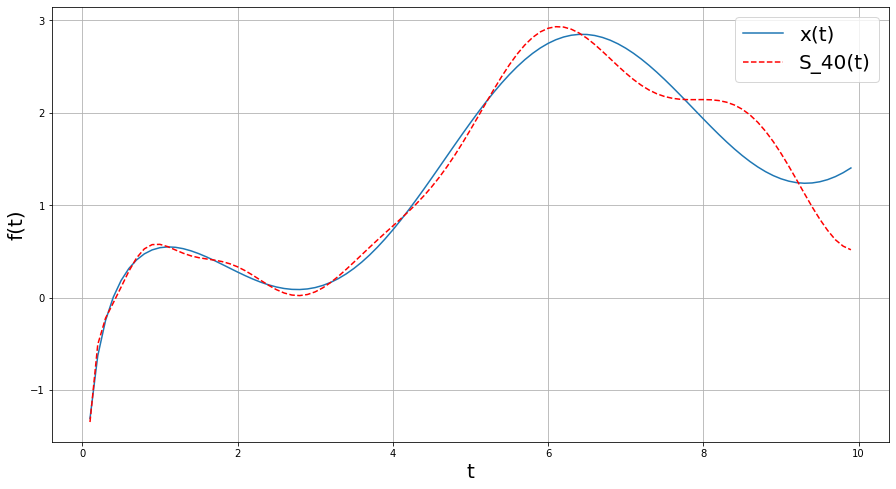

In [153]:
import numpy as np
import math as mat
import matplotlib.pyplot as plt
%matplotlib inline

f = symbols('f')
f = cos(t) + log(t)/log(exp(1))

x = np.arange(0.1, 10, 0.1)

y1 = [f.subs(t, val) for val in x]
y2 = [s_k[40].subs(t, val) for val in x]

plt.figure(figsize=(15,8))
plt.xlabel('t', fontsize = 20)
plt.ylabel('f(t)', fontsize = 20)
plt.plot(x, y1, x, y2, 'r--')
plt.legend(['x(t)', 'S_40(t)'], fontsize = 20)
plt.grid()
plt.show()

 **Ниже представлено, как функция аппроксимируется разными частичными суммами ряда Фурье для наглядности:** 

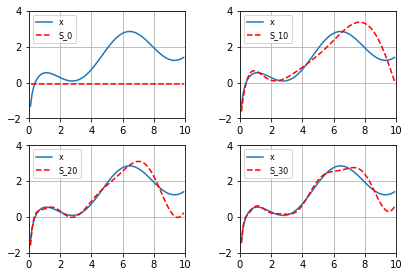

In [152]:
main = symbols('main')
main = cos(t) + log(t)/log(exp(1))

x = np.arange(0.1, 10, 0.1)
y_exact = [main.subs(t, val) for val in x]

count = 0
plt.figure()
for i in range(0, 41):
    if (i % 10 == 0 or i == 0) and i != 40:
        count += 1
        plt.subplot(2,2, count)
        y_n = [s_k[i].subs(t, val) for val in x]
        plt.plot(x, y_exact, x, y_n, 'r--')
        plt.grid(True)
        plt.legend(['x','S_{}'.format(i)], fontsize = 8)
        plt.xlim(0,10)
        plt.ylim(-2, 4)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

# Вывод:
Таким образом, по графикам наблюдается более точная аппроксимация функции $x(t)$ частичными суммами ряда Фурье на больших $n$, тем самым сходимость подтверждается.

**P.S.**
При решении были задействованы высокоуровневый язык программирования Python 3 и его библиотеки: sympy, numpy, matplotlib, math